In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import astropy.units as u
import astropy.constants as const
%matplotlib inline

In [5]:
NEA_data = pd.read_csv('PS_2023.01.18_12.09.56.csv', header=100)
NEA_data.head()
# print(len(NEA_data[NEA_data['disc_facility']=='JWST']))
print(len(NEA_data[NEA_data['discoverymethod']=='Radial Velocity']))
# print(pd.unique(NEA_data['disc_facility']))

1023


In [6]:
class planet():
    def __init__(self, radius, mass, orbper, sma, symbol = None):
        """Planet class for storing planet parameters.

        Parameters
        ----------
        radius : float
            radius in R_earth
        mass : float
            mass in M_earth
        orbper : float
            orbital perdiod in days
        sma : float
            semi-major axis in AU
        """
        self.radius = radius
        self.mass = mass
        self.orbper = orbper
        self.sma = sma
        self.symbol = symbol
        
Trappist_1e = planet(radius = 0.920, mass = 0.692, orbper = 6.101013, sma = 0.02925, symbol='☉')

In [12]:
# Creating all the planets in our solar system
earth = planet(radius = 1, mass = 1, orbper = 365, sma = 1, symbol='ⴲ')
jupiter = planet(radius = 11.209, mass = 317.8, orbper = 4332, sma = 5.2, symbol='♃')
neptune = planet(radius = 3.883, mass = 17.147, orbper = 60190, sma = 30.1, symbol='♆')
mars = planet(radius = 0.532, mass = 0.107, orbper = 687, sma = 1.52, symbol='♂')
venus = planet(radius = 0.949, mass = 0.815, orbper = 224.7, sma = 0.723, symbol='♀')
saturn = planet(radius = 9.449, mass = 95.159, orbper = 10759, sma = 9.54, symbol='♄')
uranus = planet(radius = 4.007, mass = 14.536, orbper = 30687, sma = 19.19, symbol='⛢')
mercury = planet(radius = 0.382, mass = 0.055, orbper = 88, sma = 0.387, symbol='☿')
# pluto = planet(radius = 0.186, mass = 0.002, orbper = 90560, sma = 39.48, symbol='♇')

# Creating a dictionary of all the planets
planets = {'earth': earth, 'jupiter': jupiter, 'neptune': neptune, 'mars': mars, 'venus': venus, 'saturn': saturn, 'uranus': uranus, 'mercury': mercury}

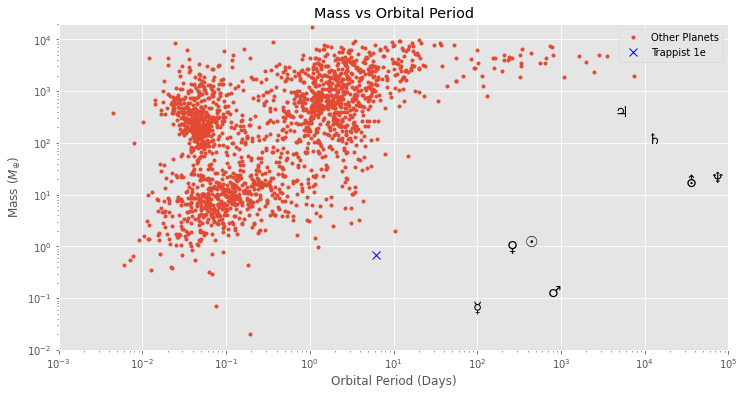

In [25]:
# Creatting the subplots
plt.style.use('ggplot')
fig, ax = plt.subplots(1,1, figsize= (12,6))
#plt.figure(figsize = (20,10))
ax.plot(NEA_data['pl_orbsmax'], NEA_data['pl_bmasse'], '.', label = 'Other Planets')

ax.plot(Trappist_1e.orbper, Trappist_1e.mass, 'x', ms = 8, c = 'blue', label = 'Trappist 1e' )

for planet in planets:
    ax.text(planets[planet].orbper, planets[planet].mass, planets[planet].symbol, fontsize = 15)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(.001, 100000)
ax.set_ylim(.01,20000)

# Creating the labels, titles, and legends
ax.set_xlabel('Orbital Period (Days)')
ax.set_ylabel(r'Mass ($M_{\oplus}$)')
ax.set_title('Mass vs Orbital Period')
ax.legend()
plt.savefig('trapp1e_compare.pdf')